# 数据处理模板

## 预设

### 导入库

In [2]:
from math import log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utils import *

### 全局参数

In [3]:
DictionaryFilePath = 'data/西安城市形象编码词表.pkl'
DataFilePath = 'data/西安城市形象数据_关键词_分类.pkl'

### 全局设置

In [4]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zackyule/.pyenv/versions/3.11.0/envs/NLP_basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 函数工具

In [5]:
def auto_label(rect_group, ax):
    """Attach a text label above each bar in *rect_group*, displaying its height."""
    for rect in rect_group:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

In [6]:
def get_influence_value(vote_num):
    return -log((1/(vote_num+1)),10)

## 数据读取

In [7]:
dictionary_comparison_table = pd.read_pickle(DictionaryFilePath)
data = pd.read_pickle(DataFilePath)
# data = data.sample(10).reset_index(drop=True)
# data.shape

In [8]:
data_during_the_covid_period = data[(data['发布时间月份']>='2021-12') & (data['发布时间月份']<='2022-01')]
data_not_during_the_covid_period = data[(data['发布时间月份'] < '2021-12') | (data['发布时间月份'] > '2022-01')]

In [9]:
data_classified = data[data['议题关键词分类']!=''].reset_index(drop=True)
data_not_during_the_covid_period_classified = data_not_during_the_covid_period[data_not_during_the_covid_period['议题关键词分类']!=''].reset_index(drop=True)
data_during_the_covid_period_classified = data_during_the_covid_period[data_during_the_covid_period['议题关键词分类']!=''].reset_index(drop=True)

In [10]:
dictionary_comparison_table_topic = dictionary_comparison_table.drop(['积极判断框架','消极判断框架','事件框架','细节框架'], axis=1)
dictionary_comparison_table_narration = dictionary_comparison_table[['积极判断框架','消极判断框架','事件框架','细节框架']]

## 数据分析

### 框架分布及变化趋势

#### 框架分布统计描述

In [49]:
# 总数统计
dictionary_statistics_topic = data[['议题关键词分类','内容']].groupby('议题关键词分类').agg('count')
dictionary_statistics_narration = data[['叙事关键词分类','内容']].groupby('叙事关键词分类').agg('count')

In [50]:
dictionary_statistics_topic = dictionary_statistics_topic.iloc[1:,:]
dictionary_statistics_narration = dictionary_statistics_narration.iloc[1:,:]

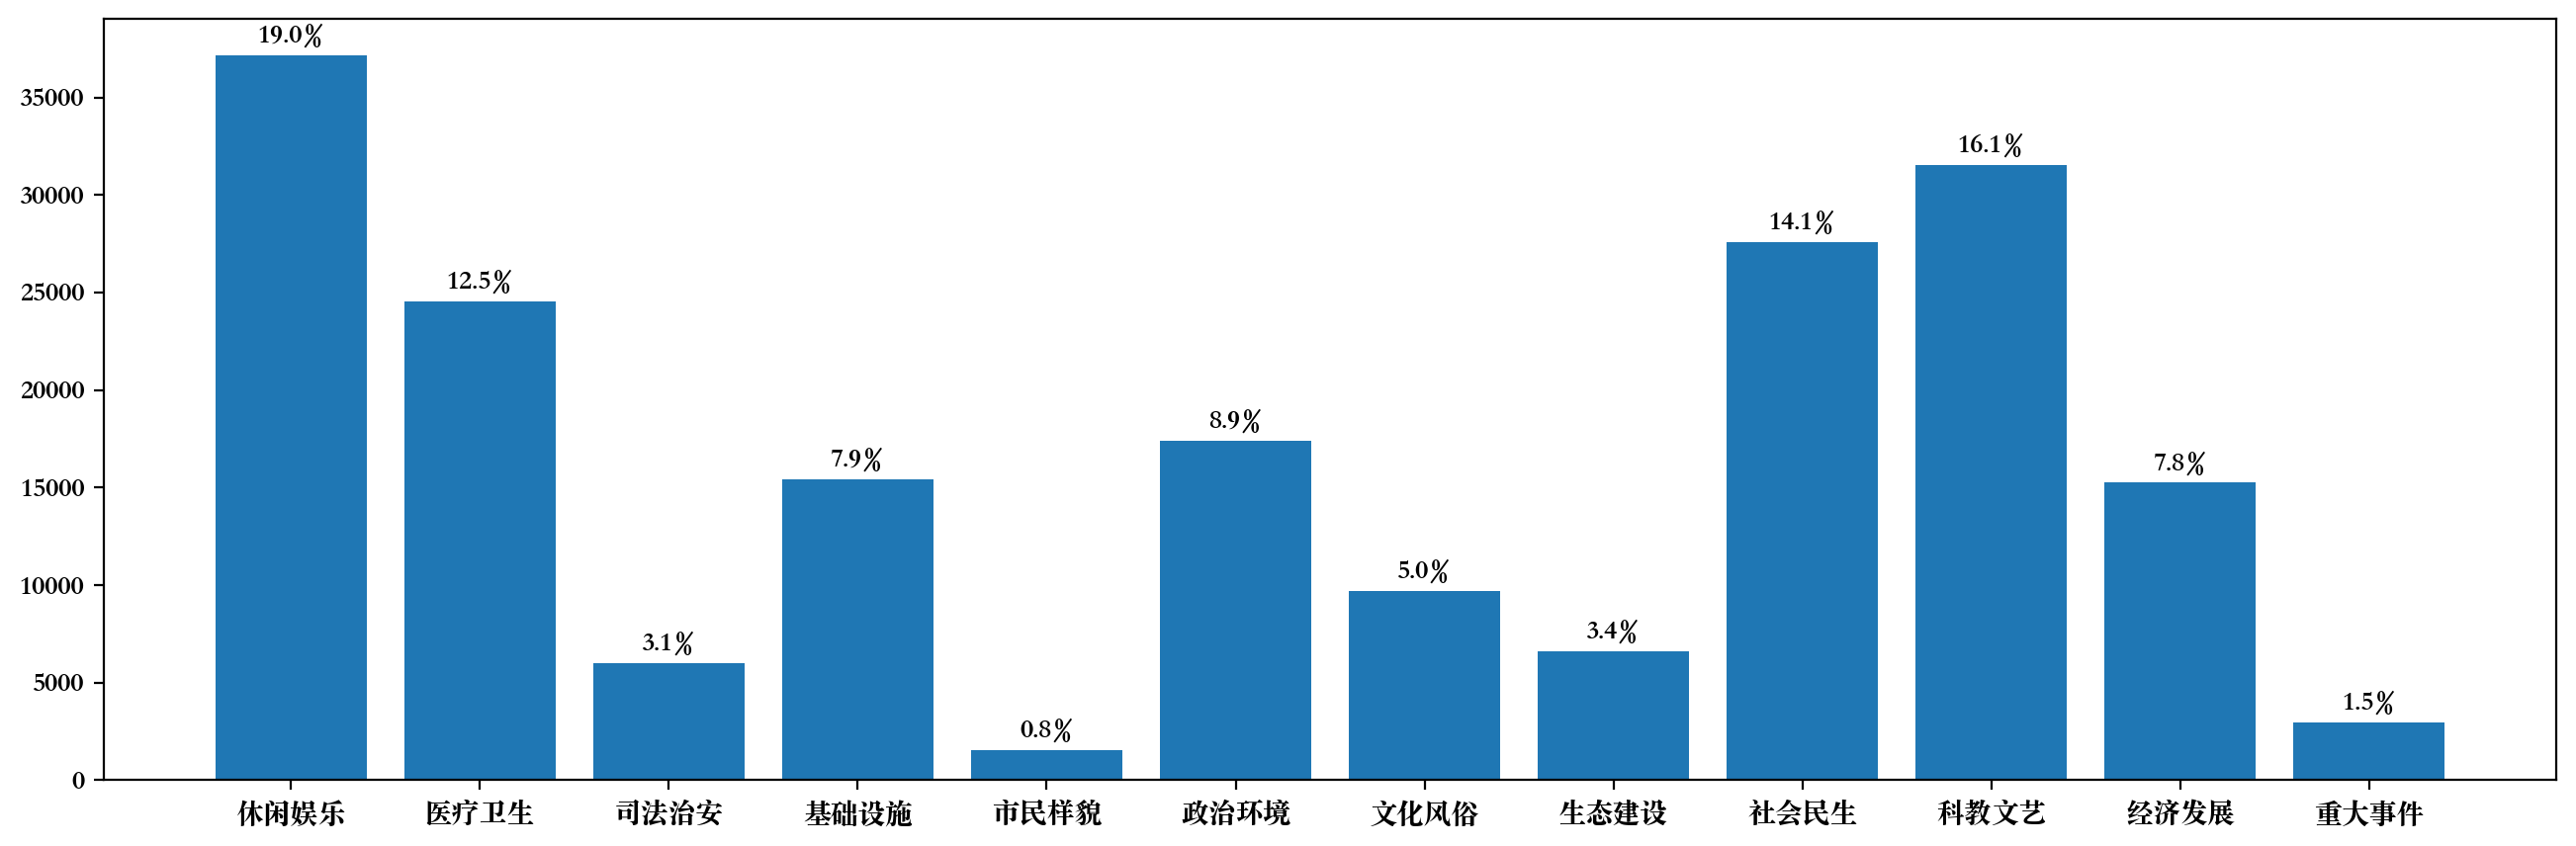

In [51]:
# 数据计算
df_to_show = dictionary_statistics_topic
labels = df_to_show.index
counts = df_to_show['内容']
proportion = (counts*100/counts.sum()).apply('{:.1f}%'.format)
# 画图
fig, ax = plt.subplots(figsize=(16, 5))
rects = ax.bar(labels, counts)
ax.bar_label(rects, labels=proportion, padding=3)
# ax.set_title('议题框架发布数统计图')
plt.show()

In [52]:
(counts*100/counts.sum()).sort_values(ascending=False).apply('{:.1f}%'.format)

议题关键词分类
休闲娱乐    19.0%
科教文艺    16.1%
社会民生    14.1%
医疗卫生    12.5%
政治环境     8.9%
基础设施     7.9%
经济发展     7.8%
文化风俗     5.0%
生态建设     3.4%
司法治安     3.1%
重大事件     1.5%
市民样貌     0.8%
Name: 内容, dtype: object

In [53]:
# 数据计算
df_to_show = dictionary_statistics_narration
labels = df_to_show.index
counts = df_to_show['内容']
proportion = (counts*100/counts.sum()).apply('{:.1f}%'.format)
# 画图
fig, ax = plt.subplots(figsize=(16, 5))
rects = ax.bar(labels, counts)
ax.bar_label(rects, labels=proportion, padding=3)
# ax.set_title('叙事框架发布数统计图')
plt.show()

In [54]:
# 数据保存
dictionary_statistics_topic.to_excel('res/议题分布数量统计.xlsx')
dictionary_statistics_narration.to_excel('res/叙事分布数量统计.xlsx')

#### 框架分布随时间变化折线图

In [55]:
period_data_topic = pd.DataFrame()
for v in dictionary_comparison_table_topic.columns:
    period_data_topic[f'{v}发布数'] = get_app_group_counts(data[data['议题关键词分类'] == v], '发布时间月份', app_name = None, column_name=f'{v}发布数', is_fill_zero=True)

In [56]:
period_data_narration = pd.DataFrame()
for v in dictionary_comparison_table_narration.columns:
    period_data_narration[f'{v}发布数'] = get_app_group_counts(data[data['叙事关键词分类'] == v], '发布时间月份', app_name = None, column_name=f'{v}发布数', is_fill_zero=True)

In [57]:
linestyle_list = [
     '.-',        
     'o--',               
     '+-.',       
     '*:', 
     's-',        
     '<-.',               
     '>--',       
     '^-',    
     '8:',          
     'p--',  
     'x-.',          
     'D:']

In [58]:
df_to_show = period_data_topic
ax = df_to_show.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True,
    style=linestyle_list)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(0,60,3))
ax.set_xticklabels(df_to_show.index[::3])
ax.set_xlabel("")
plt.show()

In [59]:
linestyle_list = [
     ':',        
     '-.',               
     '-',       
     '--', ]

In [60]:
df_to_show = period_data_narration
ax = df_to_show.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True,
    style=linestyle_list)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(0,60,3))
ax.set_xticklabels(df_to_show.index[::3])
ax.set_xlabel("")
plt.show()

In [61]:
period_data_topic['总发布数'] = get_app_group_counts(data, '发布时间月份', app_name = None, column_name='总发布数', is_fill_zero=True)
period_data_topic.to_excel('res/议题发布时间分布.xlsx')

In [62]:
period_data_narration['总发布数'] = get_app_group_counts(data, '发布时间月份', app_name = None, column_name='总发布数', is_fill_zero=True)
period_data_narration.to_excel('res/叙事发布时间分布.xlsx')

#### 框架分布统计描述_疫情期间 

In [63]:
dictionary_statistics_topic_covid = data_during_the_covid_period[['议题关键词分类','内容']].groupby('议题关键词分类').agg('count')
dictionary_statistics_narration_covid = data_during_the_covid_period[['叙事关键词分类','内容']].groupby('叙事关键词分类').agg('count')

In [64]:
dictionary_statistics_topic_covid = dictionary_statistics_topic_covid.iloc[1:,:]
dictionary_statistics_narration_covid = dictionary_statistics_narration_covid.iloc[1:,:]

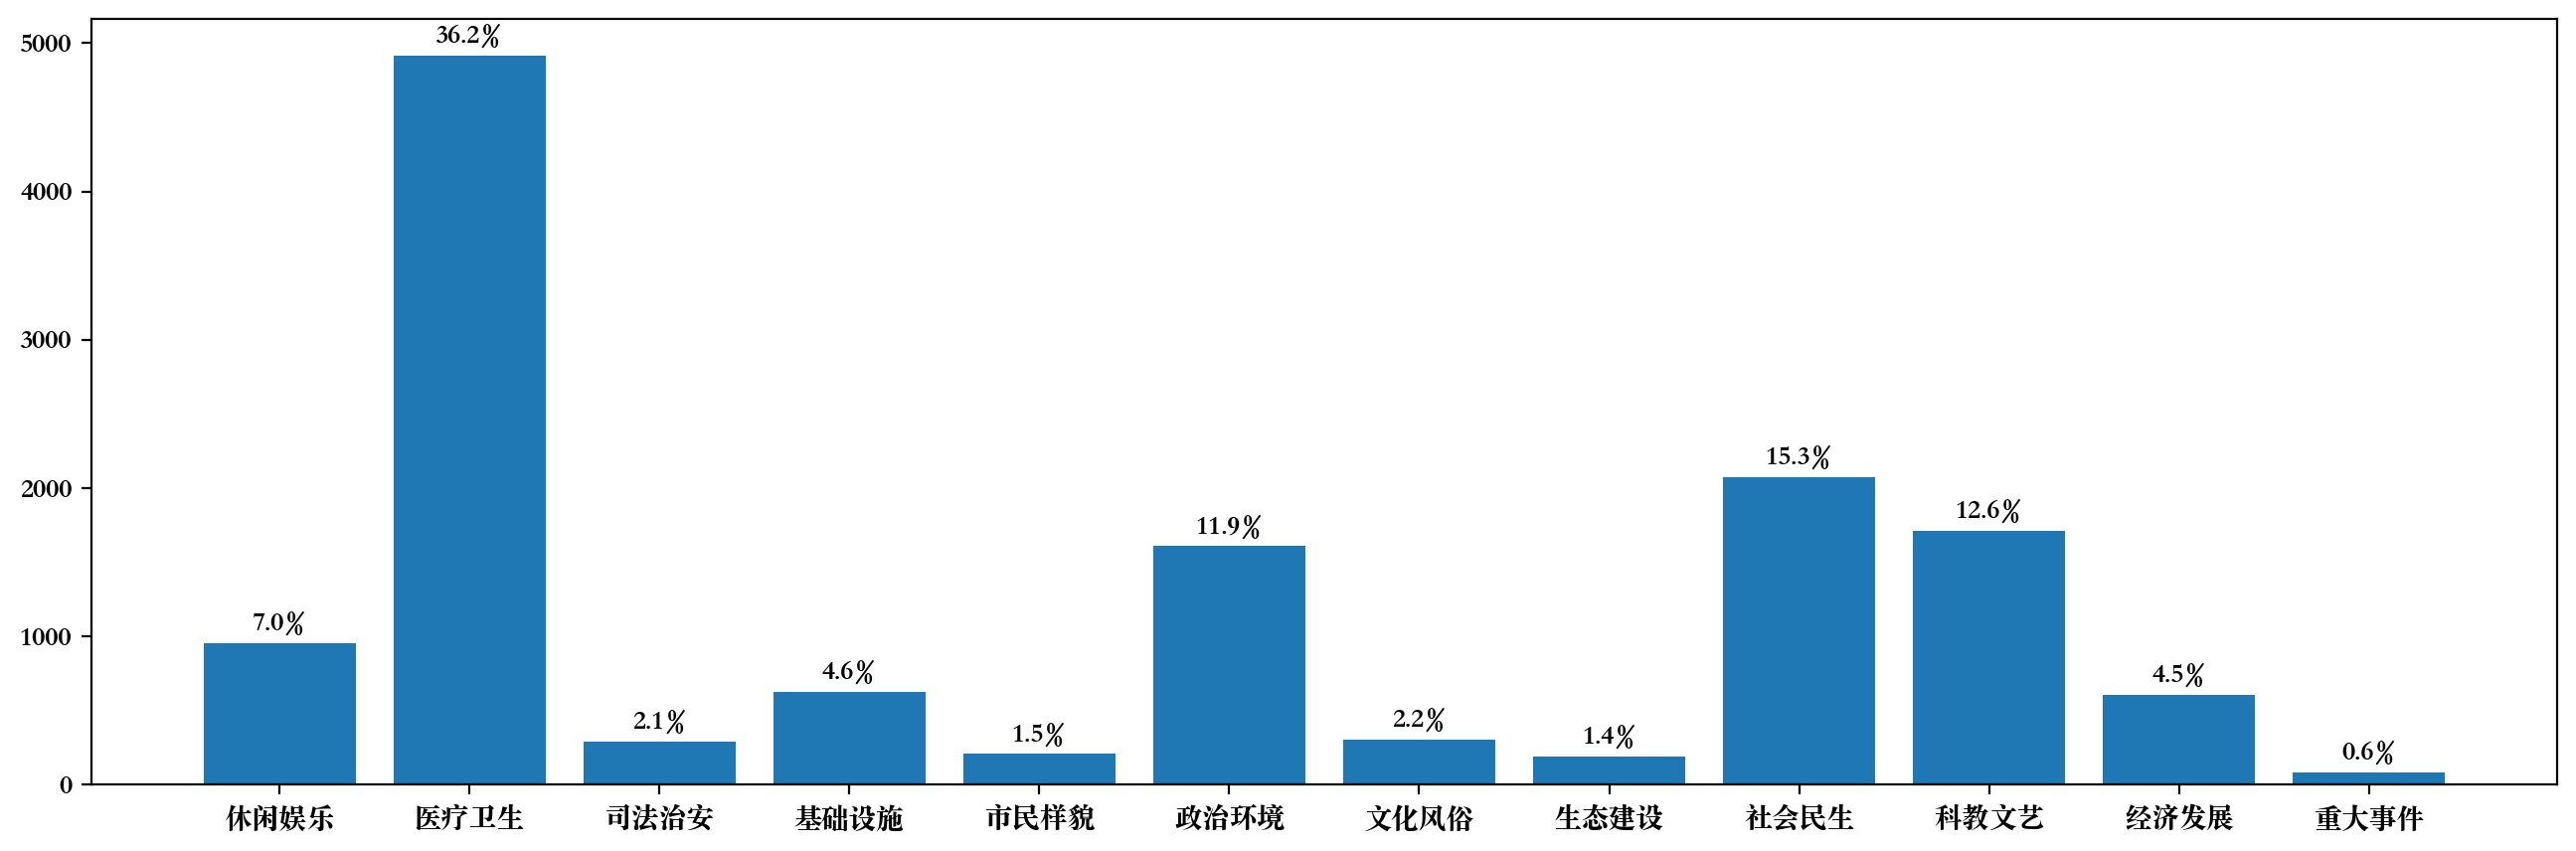

In [65]:
# 数据计算
df_to_show = dictionary_statistics_topic_covid
labels = df_to_show.index
counts = df_to_show['内容']
proportion = (counts*100/counts.sum()).apply('{:.1f}%'.format)
# 画图
fig, ax = plt.subplots(figsize=(16, 5))
rects = ax.bar(labels, counts)
ax.bar_label(rects, labels=proportion, padding=3)
# ax.set_title('疫情期间议题框架发布数统计图')
plt.show()

In [66]:
# 数据计算
df_to_show = dictionary_statistics_narration_covid
labels = df_to_show.index
counts = df_to_show['内容']
proportion = (counts*100/counts.sum()).apply('{:.1f}%'.format)
# 画图
fig, ax = plt.subplots(figsize=(16, 5))
rects = ax.bar(labels, counts)
ax.bar_label(rects, labels=proportion, padding=3)
# ax.set_title('疫情期间叙事框架发布数统计图')
plt.show()

In [67]:
# 数据保存
dictionary_statistics_topic_covid.to_excel('res/疫情期间议题分布数量统计.xlsx')
dictionary_statistics_narration_covid.to_excel('res/疫情期间叙事分布数量统计.xlsx')

#### 框架分布随时间变化折线图_疫情期间

In [68]:
data_during_the_covid_period = data_during_the_covid_period.copy()
data_during_the_covid_period['发布时间日期'] = data_during_the_covid_period['发布时间'].dt.strftime('%Y-%m-%d')

In [69]:
period_data_topic_covid = pd.DataFrame()
for v in dictionary_comparison_table_topic.columns:
    period_data_topic_covid[f'{v}发布数'] = get_app_group_counts(data_during_the_covid_period[data_during_the_covid_period['议题关键词分类'] == v], '发布时间日期', app_name = None, column_name=f'{v}发布数', is_fill_zero=True)

In [70]:
period_data_narration_covid = pd.DataFrame()
for v in dictionary_comparison_table_narration.columns:
    period_data_narration_covid[f'{v}发布数'] = get_app_group_counts(data_during_the_covid_period[data_during_the_covid_period['叙事关键词分类'] == v], '发布时间日期', app_name = None, column_name=f'{v}发布数', is_fill_zero=True)

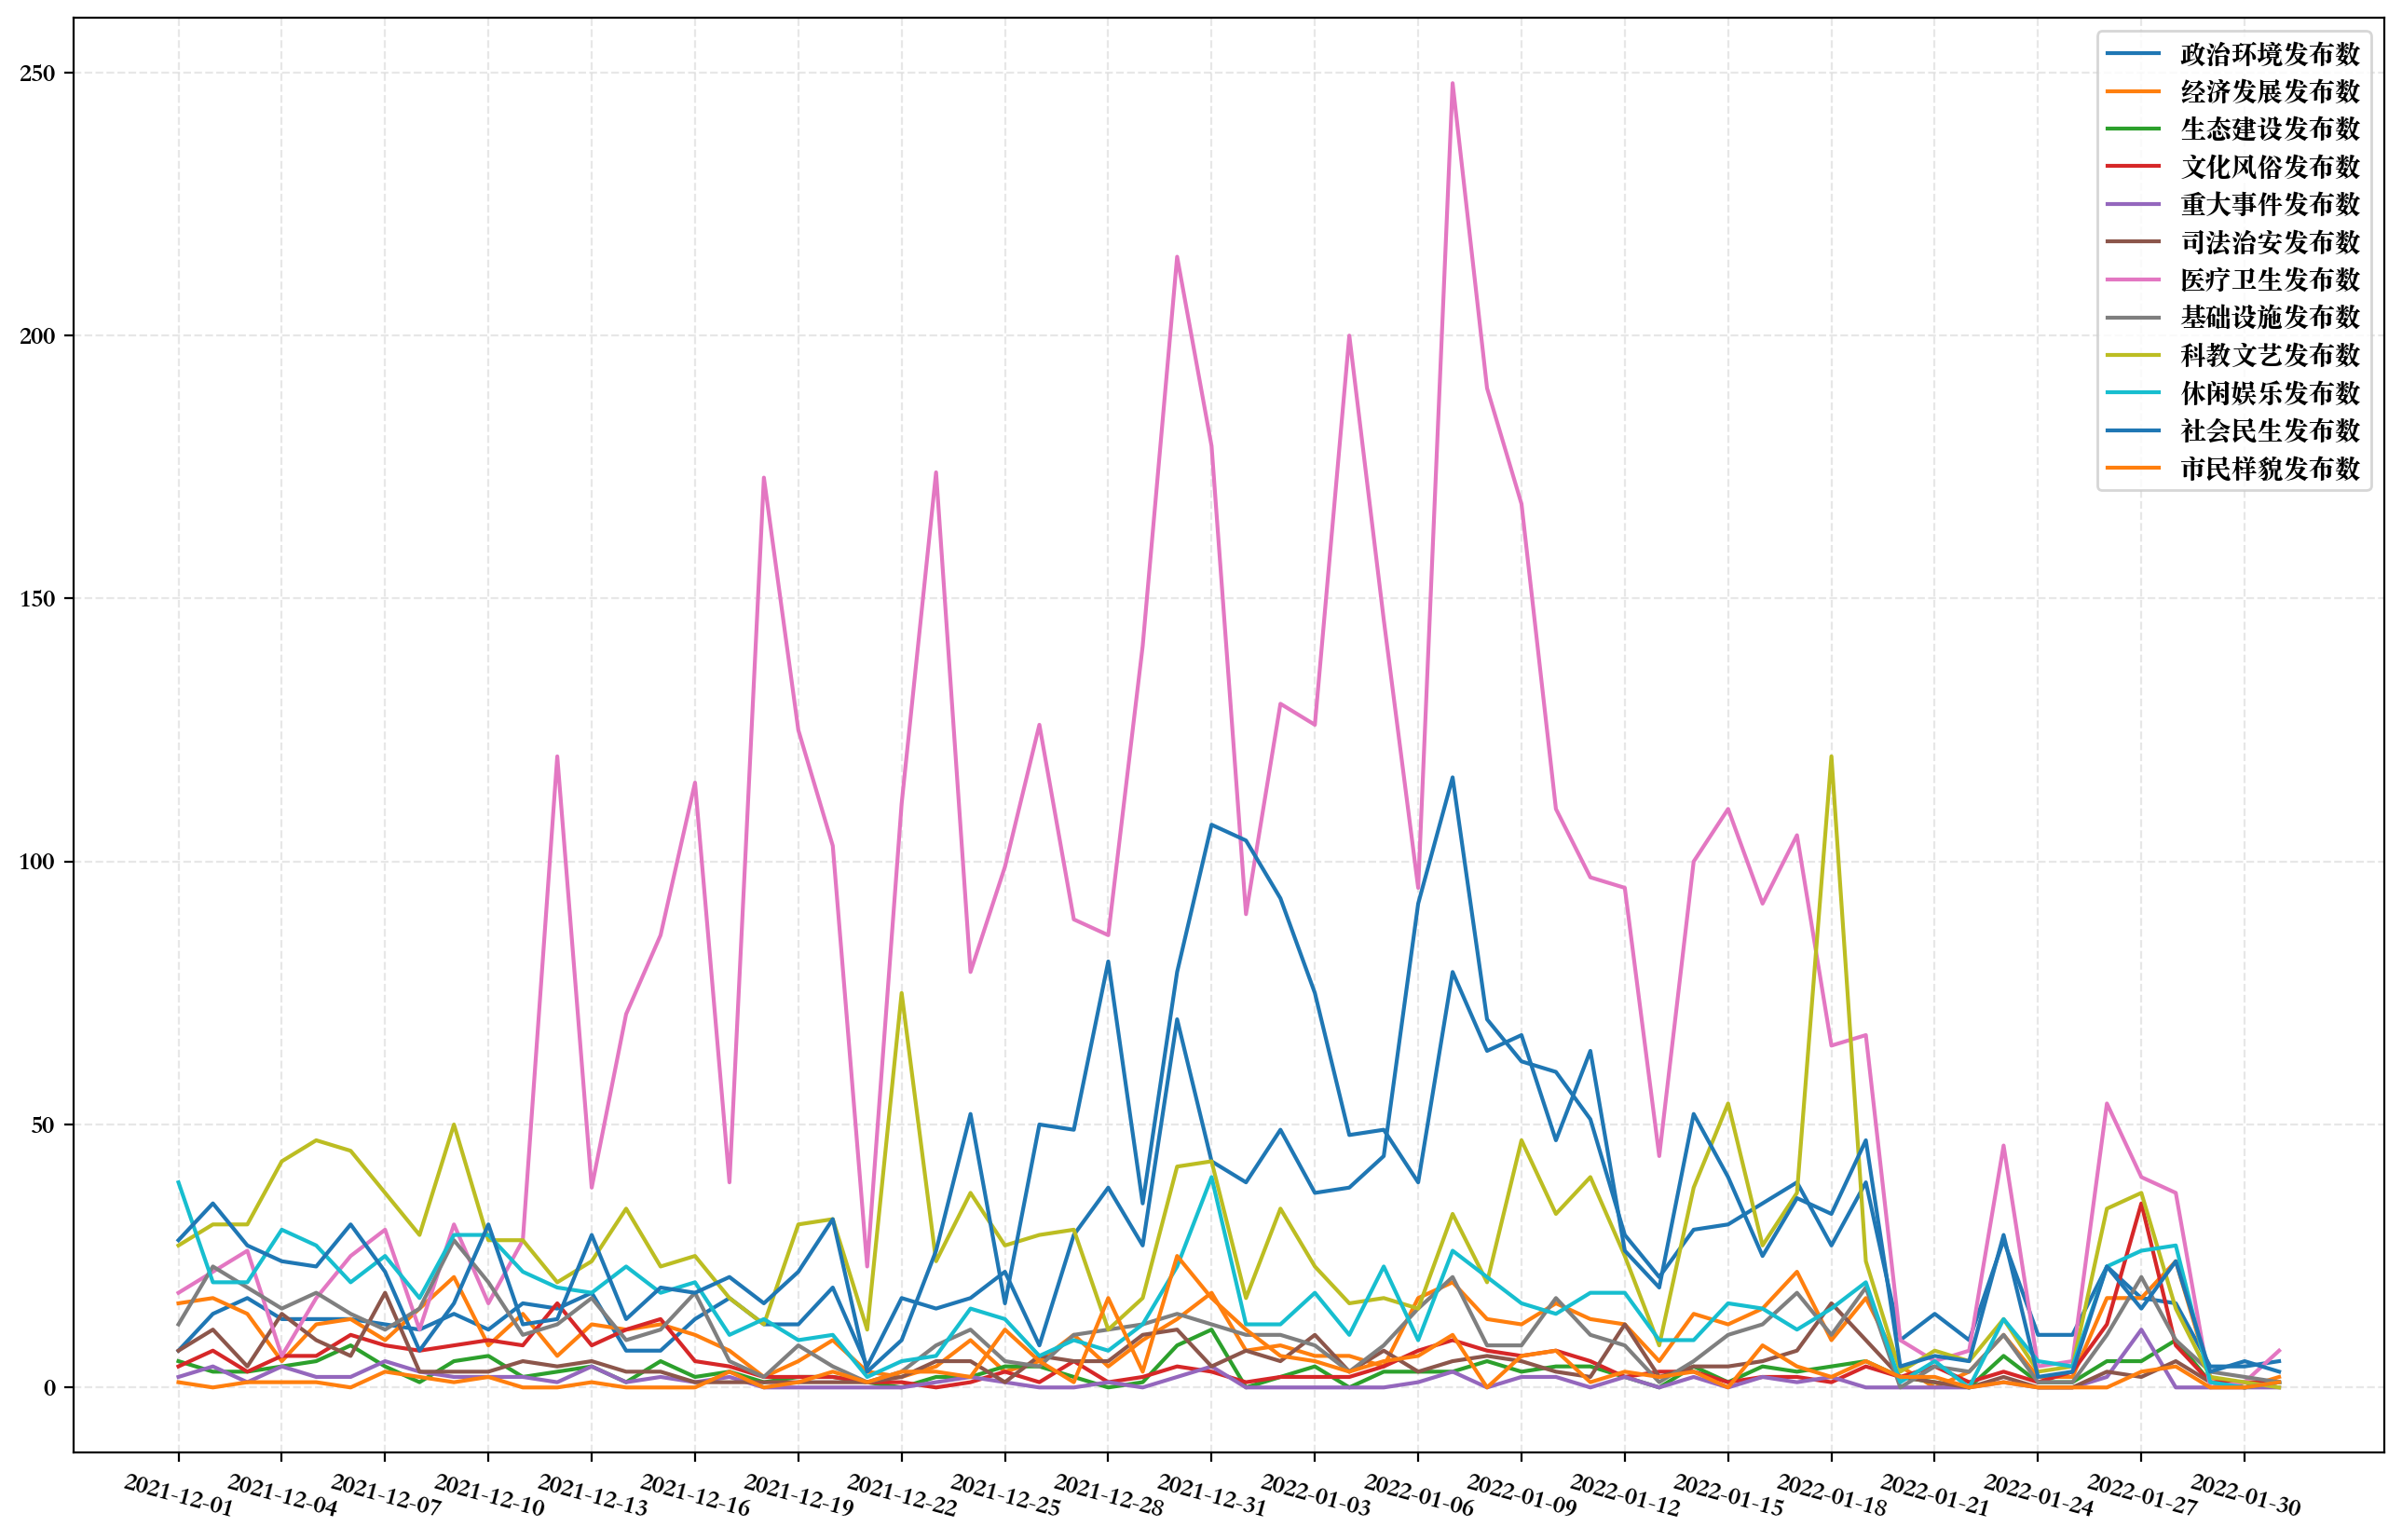

In [71]:
df_to_show = period_data_topic_covid
df_to_show = df_to_show.fillna(0)
ax = df_to_show.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(0,62,3))
ax.set_xticklabels(df_to_show.index[::3])
plt.xticks(rotation=-15) 
ax.set_xlabel("")
plt.show()

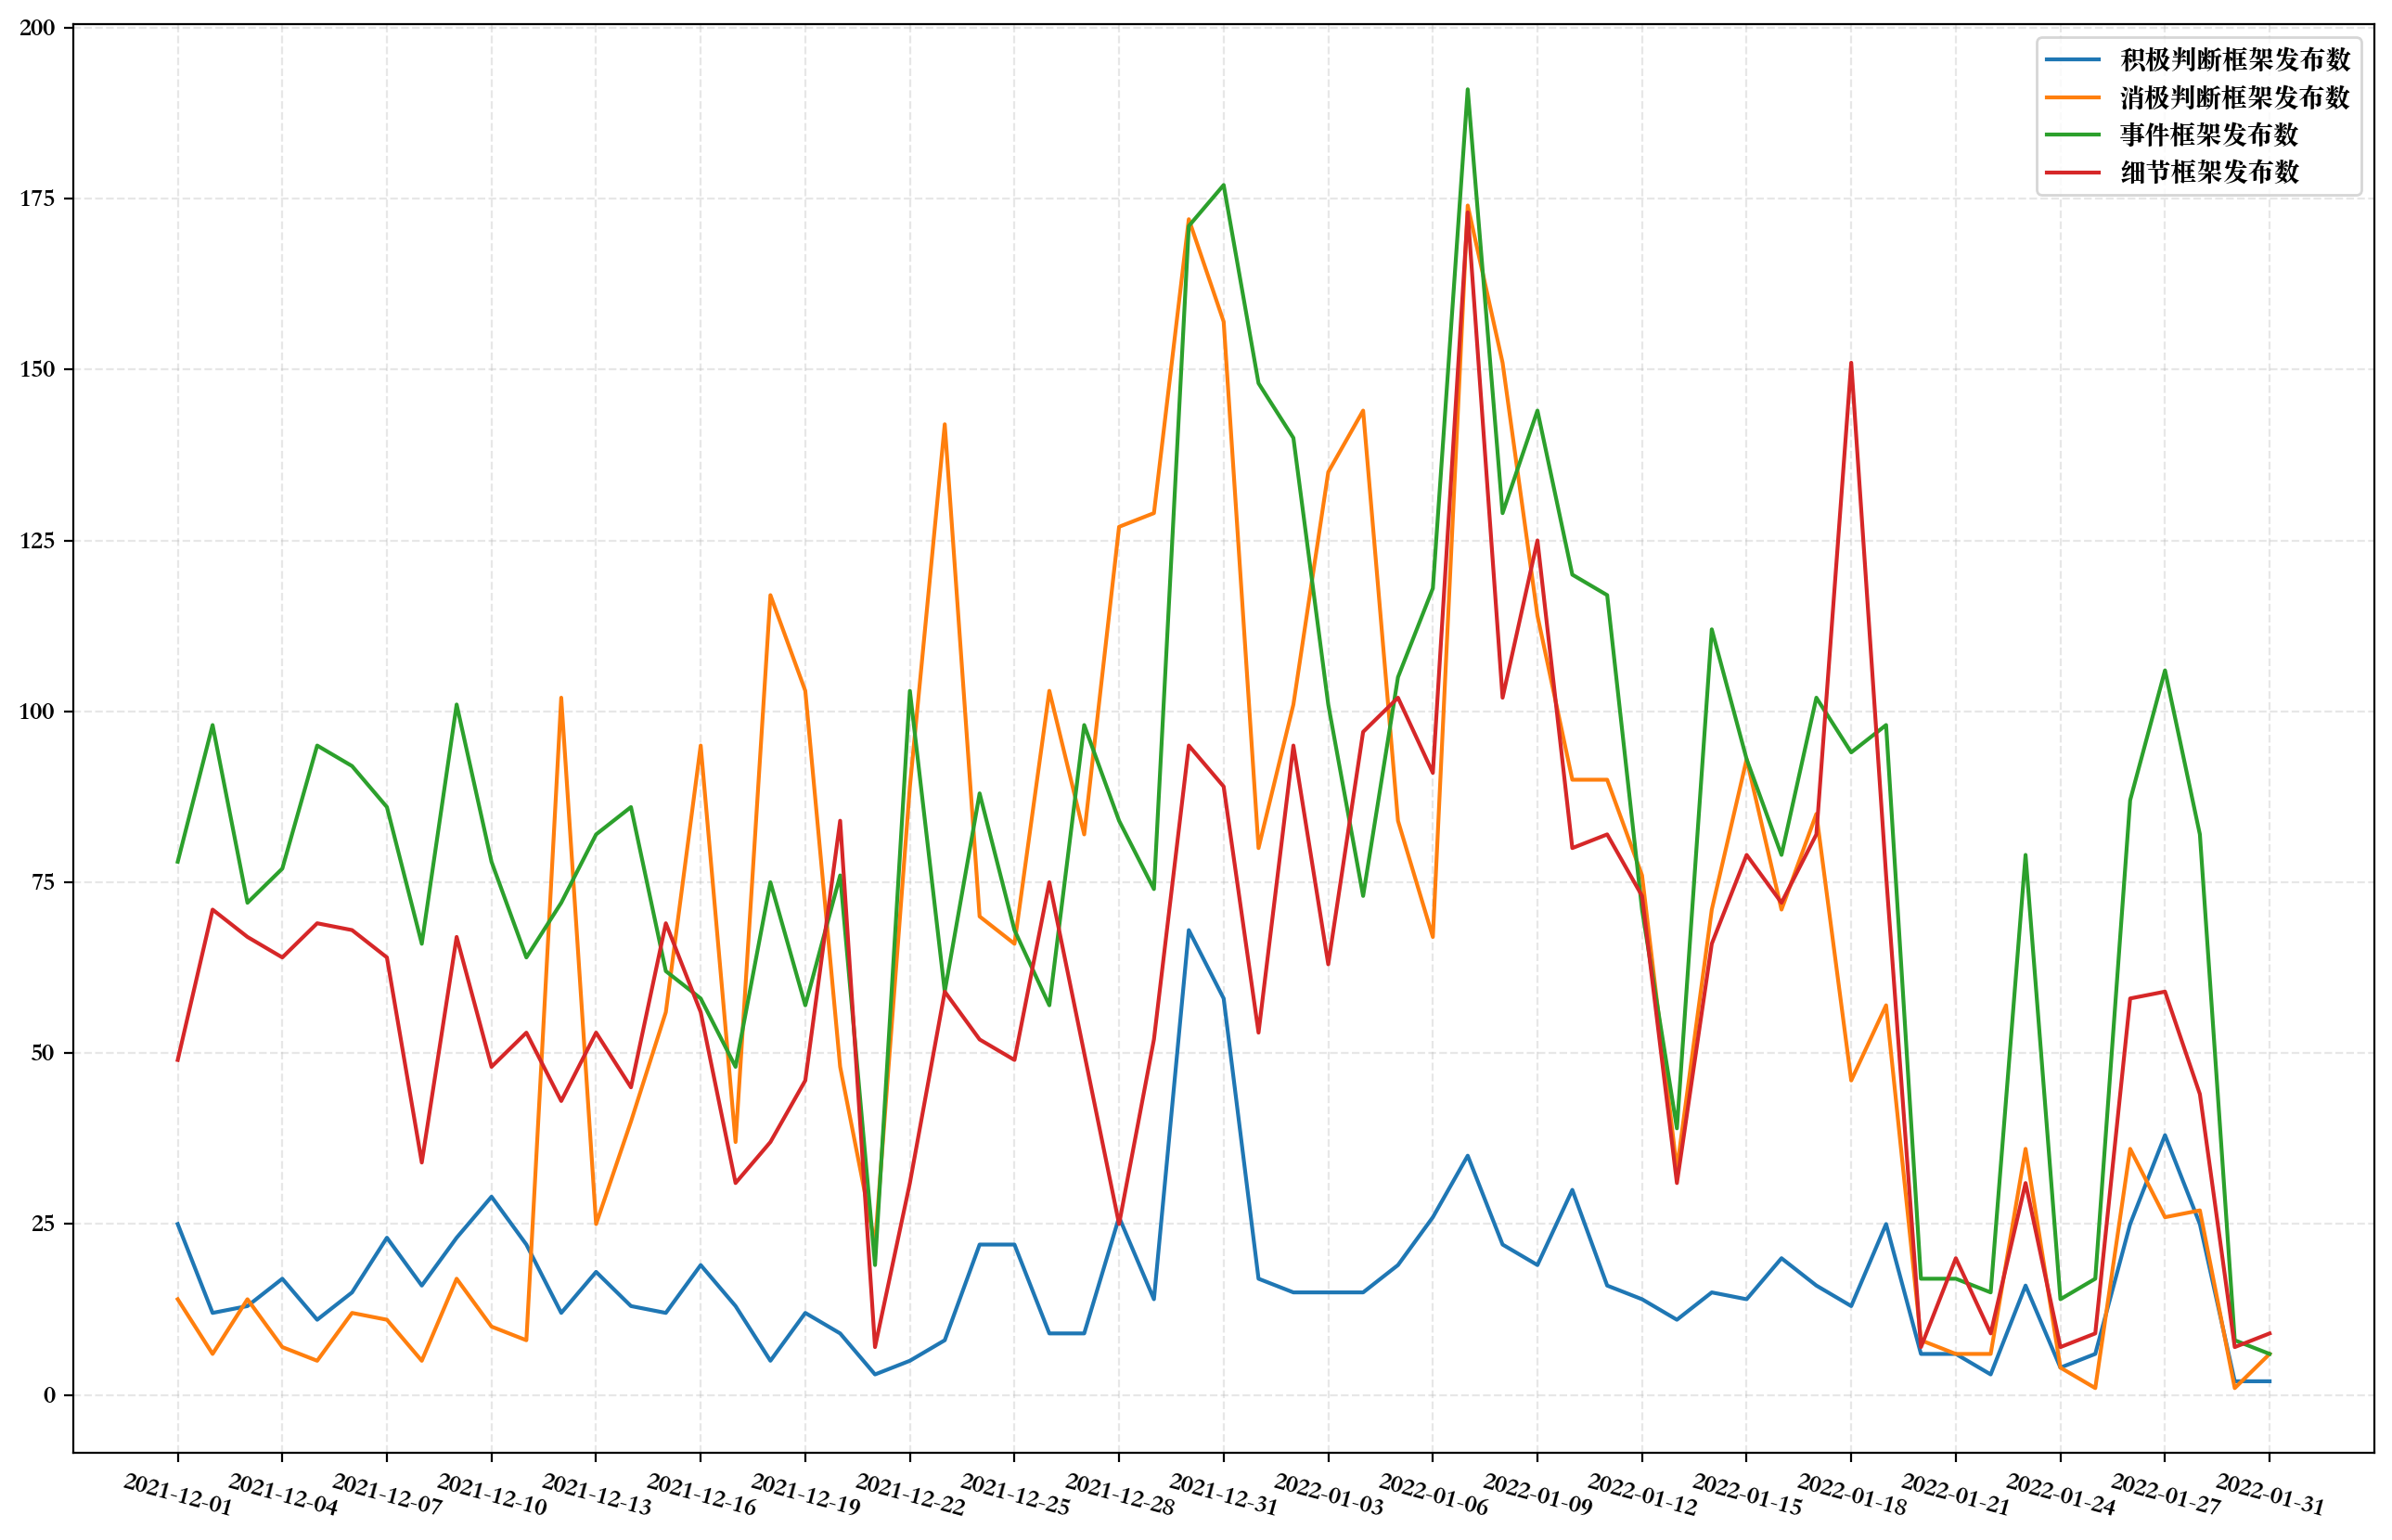

In [72]:
df_to_show = period_data_narration_covid
ax = df_to_show.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(0,62,3))
ax.set_xticklabels(df_to_show.index[::3])
plt.xticks(rotation=-15) 
ax.set_xlabel("")
plt.show()

### 框架特征

#### 非疫情期间 不同议题、叙事框架选择 对应分析

In [11]:
data_not_during_the_covid_period_classified[data_not_during_the_covid_period_classified['平台']=='微博'].shape

(171507, 14)

In [12]:
data_correspondence_between_topic_and_narration_analysis_not_covid_sample = data_not_during_the_covid_period_classified[['平台', '议题关键词分类', '叙事关键词分类']]
data_correspondence_between_topic_and_narration_analysis_not_covid_sample.to_csv('res/非疫情期间框架对应分析.csv')

In [15]:
crosstab_between_topic_and_narration_analysis_not_covid = pd.crosstab(data_not_during_the_covid_period_classified['议题关键词分类'],data_not_during_the_covid_period_classified['叙事关键词分类'],margins=True)
crosstab_between_topic_and_narration_analysis_not_covid.to_excel('res/非疫情期间议题叙事交叉表.xlsx')
crosstab_between_app_and_narration_analysis_not_covid = pd.crosstab(data_not_during_the_covid_period_classified['平台'],data_not_during_the_covid_period_classified['叙事关键词分类'],margins=True)
crosstab_between_app_and_narration_analysis_not_covid.to_excel('res/非疫情期间平台叙事交叉表.xlsx')
crosstab_between_topic_and_app_analysis_not_covid = pd.crosstab(data_not_during_the_covid_period_classified['平台'],data_not_during_the_covid_period_classified['议题关键词分类'],margins=True)
crosstab_between_topic_and_app_analysis_not_covid.to_excel('res/非疫情期间平台议题交叉表.xlsx')

In [24]:
crosstab_between_topic_and_narration_analysis_not_covid = pd.crosstab(data_not_during_the_covid_period_classified['议题关键词分类'],data_not_during_the_covid_period_classified['叙事关键词分类'],margins=True, normalize=True)
crosstab_between_topic_and_narration_analysis_not_covid.to_excel('res/非疫情期间议题叙事占比交叉表.xlsx')
crosstab_between_app_and_narration_analysis_not_covid = pd.crosstab(data_not_during_the_covid_period_classified['平台'],data_not_during_the_covid_period_classified['叙事关键词分类'],margins=True, normalize=True)
crosstab_between_app_and_narration_analysis_not_covid.to_excel('res/非疫情期间平台叙事占比交叉表.xlsx')
crosstab_between_topic_and_app_analysis_not_covid = pd.crosstab(data_not_during_the_covid_period_classified['平台'],data_not_during_the_covid_period_classified['议题关键词分类'],margins=True, normalize=True)
crosstab_between_topic_and_app_analysis_not_covid.to_excel('res/非疫情期间平台议题占比交叉表.xlsx')

#### 非疫情期间 不同平台议题、叙述框架选择 对应分析&差异分析

###### 豆瓣数据只有830，对其他两个平台数据也抽样830条一起分析

In [18]:
data_correspondence_analysis_douban = data_not_during_the_covid_period_classified[data_not_during_the_covid_period_classified['平台']=='豆瓣']
data_correspondence_analysis_zhihu = data_not_during_the_covid_period_classified[data_not_during_the_covid_period_classified['平台']=='知乎'].sample(830)
data_correspondence_analysis_weibo = data_not_during_the_covid_period_classified[data_not_during_the_covid_period_classified['平台']=='微博'].sample(830)
data_correspondence_analysis_sample = pd.concat([data_correspondence_analysis_douban, data_correspondence_analysis_zhihu, data_correspondence_analysis_weibo])

In [76]:
data_correspondence_between_source_and_frame_analysis_not_covid_sample = data_correspondence_analysis_sample[['平台', '议题关键词分类', '叙事关键词分类']]
data_correspondence_between_source_and_frame_analysis_not_covid_sample.to_csv('res/非疫情期间平台框架分析.csv')

#### 疫情期间 不同平台议题、不同议题、叙事框架选择 对应分析&差异分析

###### 疫情期间的豆瓣数据只有64条了，下边是把所有疫情间数据都进行了保存

In [22]:
data_correspondence_between_topic_and_narration_analysis_during_covid_sample = data_during_the_covid_period_classified[['平台', '议题关键词分类', '叙事关键词分类']]
data_correspondence_between_topic_and_narration_analysis_during_covid_sample.to_csv('res/疫情期间平台框架分析.csv')

In [23]:
crosstab_between_topic_and_narration_analysis_during_covid = pd.crosstab(data_correspondence_between_topic_and_narration_analysis_during_covid_sample['议题关键词分类'],data_correspondence_between_topic_and_narration_analysis_during_covid_sample['叙事关键词分类'],margins=True)
crosstab_between_topic_and_narration_analysis_during_covid.to_excel('res/疫情期间议题叙事交叉表.xlsx')
crosstab_between_app_and_narration_analysis_during_covid = pd.crosstab(data_correspondence_between_topic_and_narration_analysis_during_covid_sample['平台'],data_correspondence_between_topic_and_narration_analysis_during_covid_sample['叙事关键词分类'],margins=True)
crosstab_between_app_and_narration_analysis_during_covid.to_excel('res/疫情期间平台叙事交叉表.xlsx')
crosstab_between_topic_and_app_analysis_during_covid = pd.crosstab(data_correspondence_between_topic_and_narration_analysis_during_covid_sample['平台'],data_correspondence_between_topic_and_narration_analysis_during_covid_sample['议题关键词分类'],margins=True)
crosstab_between_topic_and_app_analysis_during_covid.to_excel('res/疫情期间平台议题交叉表.xlsx')

In [25]:
crosstab_between_topic_and_narration_analysis_during_covid = pd.crosstab(data_correspondence_between_topic_and_narration_analysis_during_covid_sample['议题关键词分类'],data_correspondence_between_topic_and_narration_analysis_during_covid_sample['叙事关键词分类'],margins=True, normalize=True)
crosstab_between_topic_and_narration_analysis_during_covid.to_excel('res/疫情期间议题叙事占比交叉表.xlsx')
crosstab_between_app_and_narration_analysis_during_covid = pd.crosstab(data_correspondence_between_topic_and_narration_analysis_during_covid_sample['平台'],data_correspondence_between_topic_and_narration_analysis_during_covid_sample['叙事关键词分类'],margins=True, normalize=True)
crosstab_between_app_and_narration_analysis_during_covid.to_excel('res/疫情期间平台叙事占比交叉表.xlsx')
crosstab_between_topic_and_app_analysis_during_covid = pd.crosstab(data_correspondence_between_topic_and_narration_analysis_during_covid_sample['平台'],data_correspondence_between_topic_and_narration_analysis_during_covid_sample['议题关键词分类'],margins=True, normalize=True)
crosstab_between_topic_and_app_analysis_during_covid.to_excel('res/疫情期间平台议题占比交叉表.xlsx')

### 框架效果

#### 议题框架、叙事框架 叙述效果 差异分析

In [78]:
data_correspondence_between_vote_and_topic_analysis_sample = data_classified[['议题关键词分类', '叙事关键词分类', '点赞数']].copy()
data_correspondence_between_vote_and_topic_analysis_sample['影响力'] = data_correspondence_between_vote_and_topic_analysis_sample['点赞数'].apply(get_influence_value)
data_correspondence_between_vote_and_topic_analysis_sample.to_csv('res/框架效果差异分析.csv')

### 补充分析

#### 平台-发布数时间分布统计

In [79]:
# 发布数统计（时间段）
data_time_count = pd.DataFrame()
data_time_count['帖子发布总量'] = get_app_group_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_time_count[app_name] = get_app_group_counts(data, '发布时间月份', app_name, is_fill_zero=True)

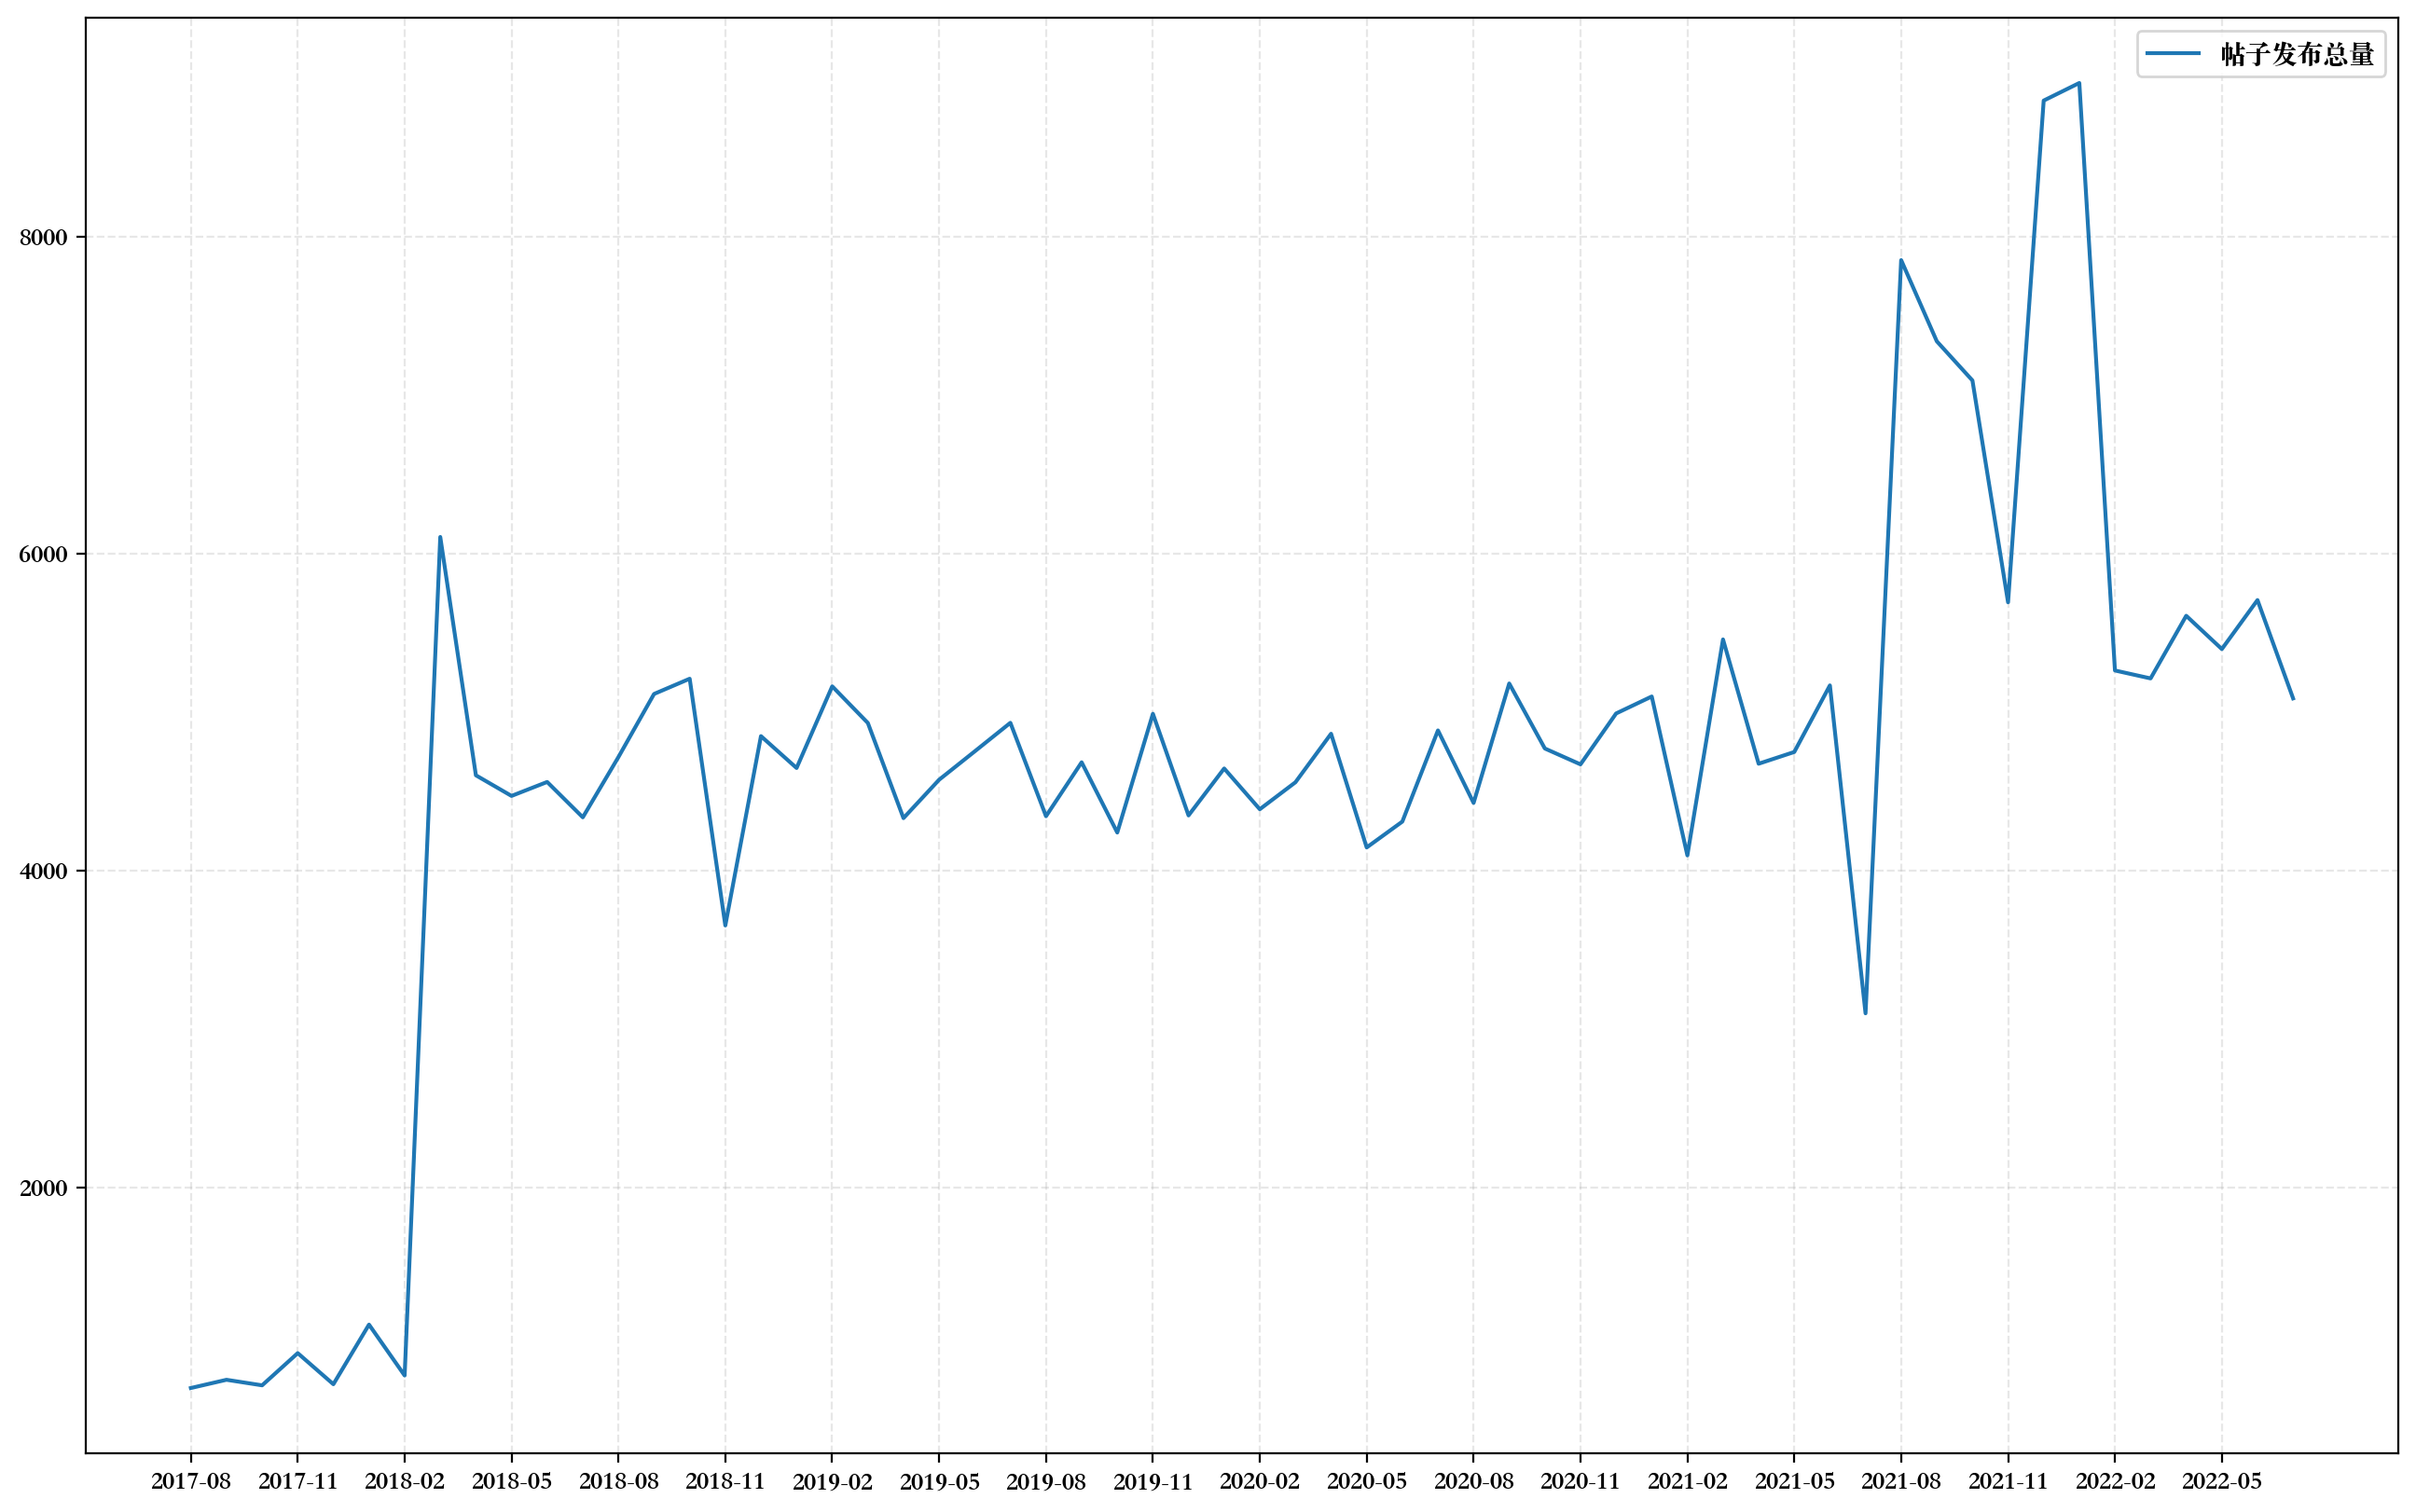

In [80]:
ax = data_time_count.loc[:, ['帖子发布总量']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(0,60,3))
ax.set_xticklabels(data_time_count.index[::3])
ax.set_xlabel("")
plt.show()

In [81]:
data_time_count[data_time_count['微博']>6000]

帖子发布总量  豆瓣   知乎    微博
发布时间月份                        
2018-03    6105  11   34  6060
2021-08    7851  16  193  7642
2021-09    7339  32  435  6872
2021-10    7092  38  169  6885
2021-12    8857  50  548  8259

In [82]:
dt = data_time_count[(data_time_count.index>='2021-06')&(data_time_count.index<='2022-05')]

In [1]:
ax = dt.loc[:, ['帖子发布总量', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(len(dt.index)))
ax.set_xticklabels(dt.index)
ax.set_xlabel("")
plt.show()

NameError: name 'dt' is not defined

#### 平台-点赞数时间分布统计

In [ ]:
# 点赞统计（按月）
data_vote_count = pd.DataFrame()
data_vote_count['总数'] = get_app_sum_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_vote_count[app_name] = get_app_sum_counts(data, '发布时间月份', app_name=app_name)
data_vote_count = data_vote_count.fillna(0)

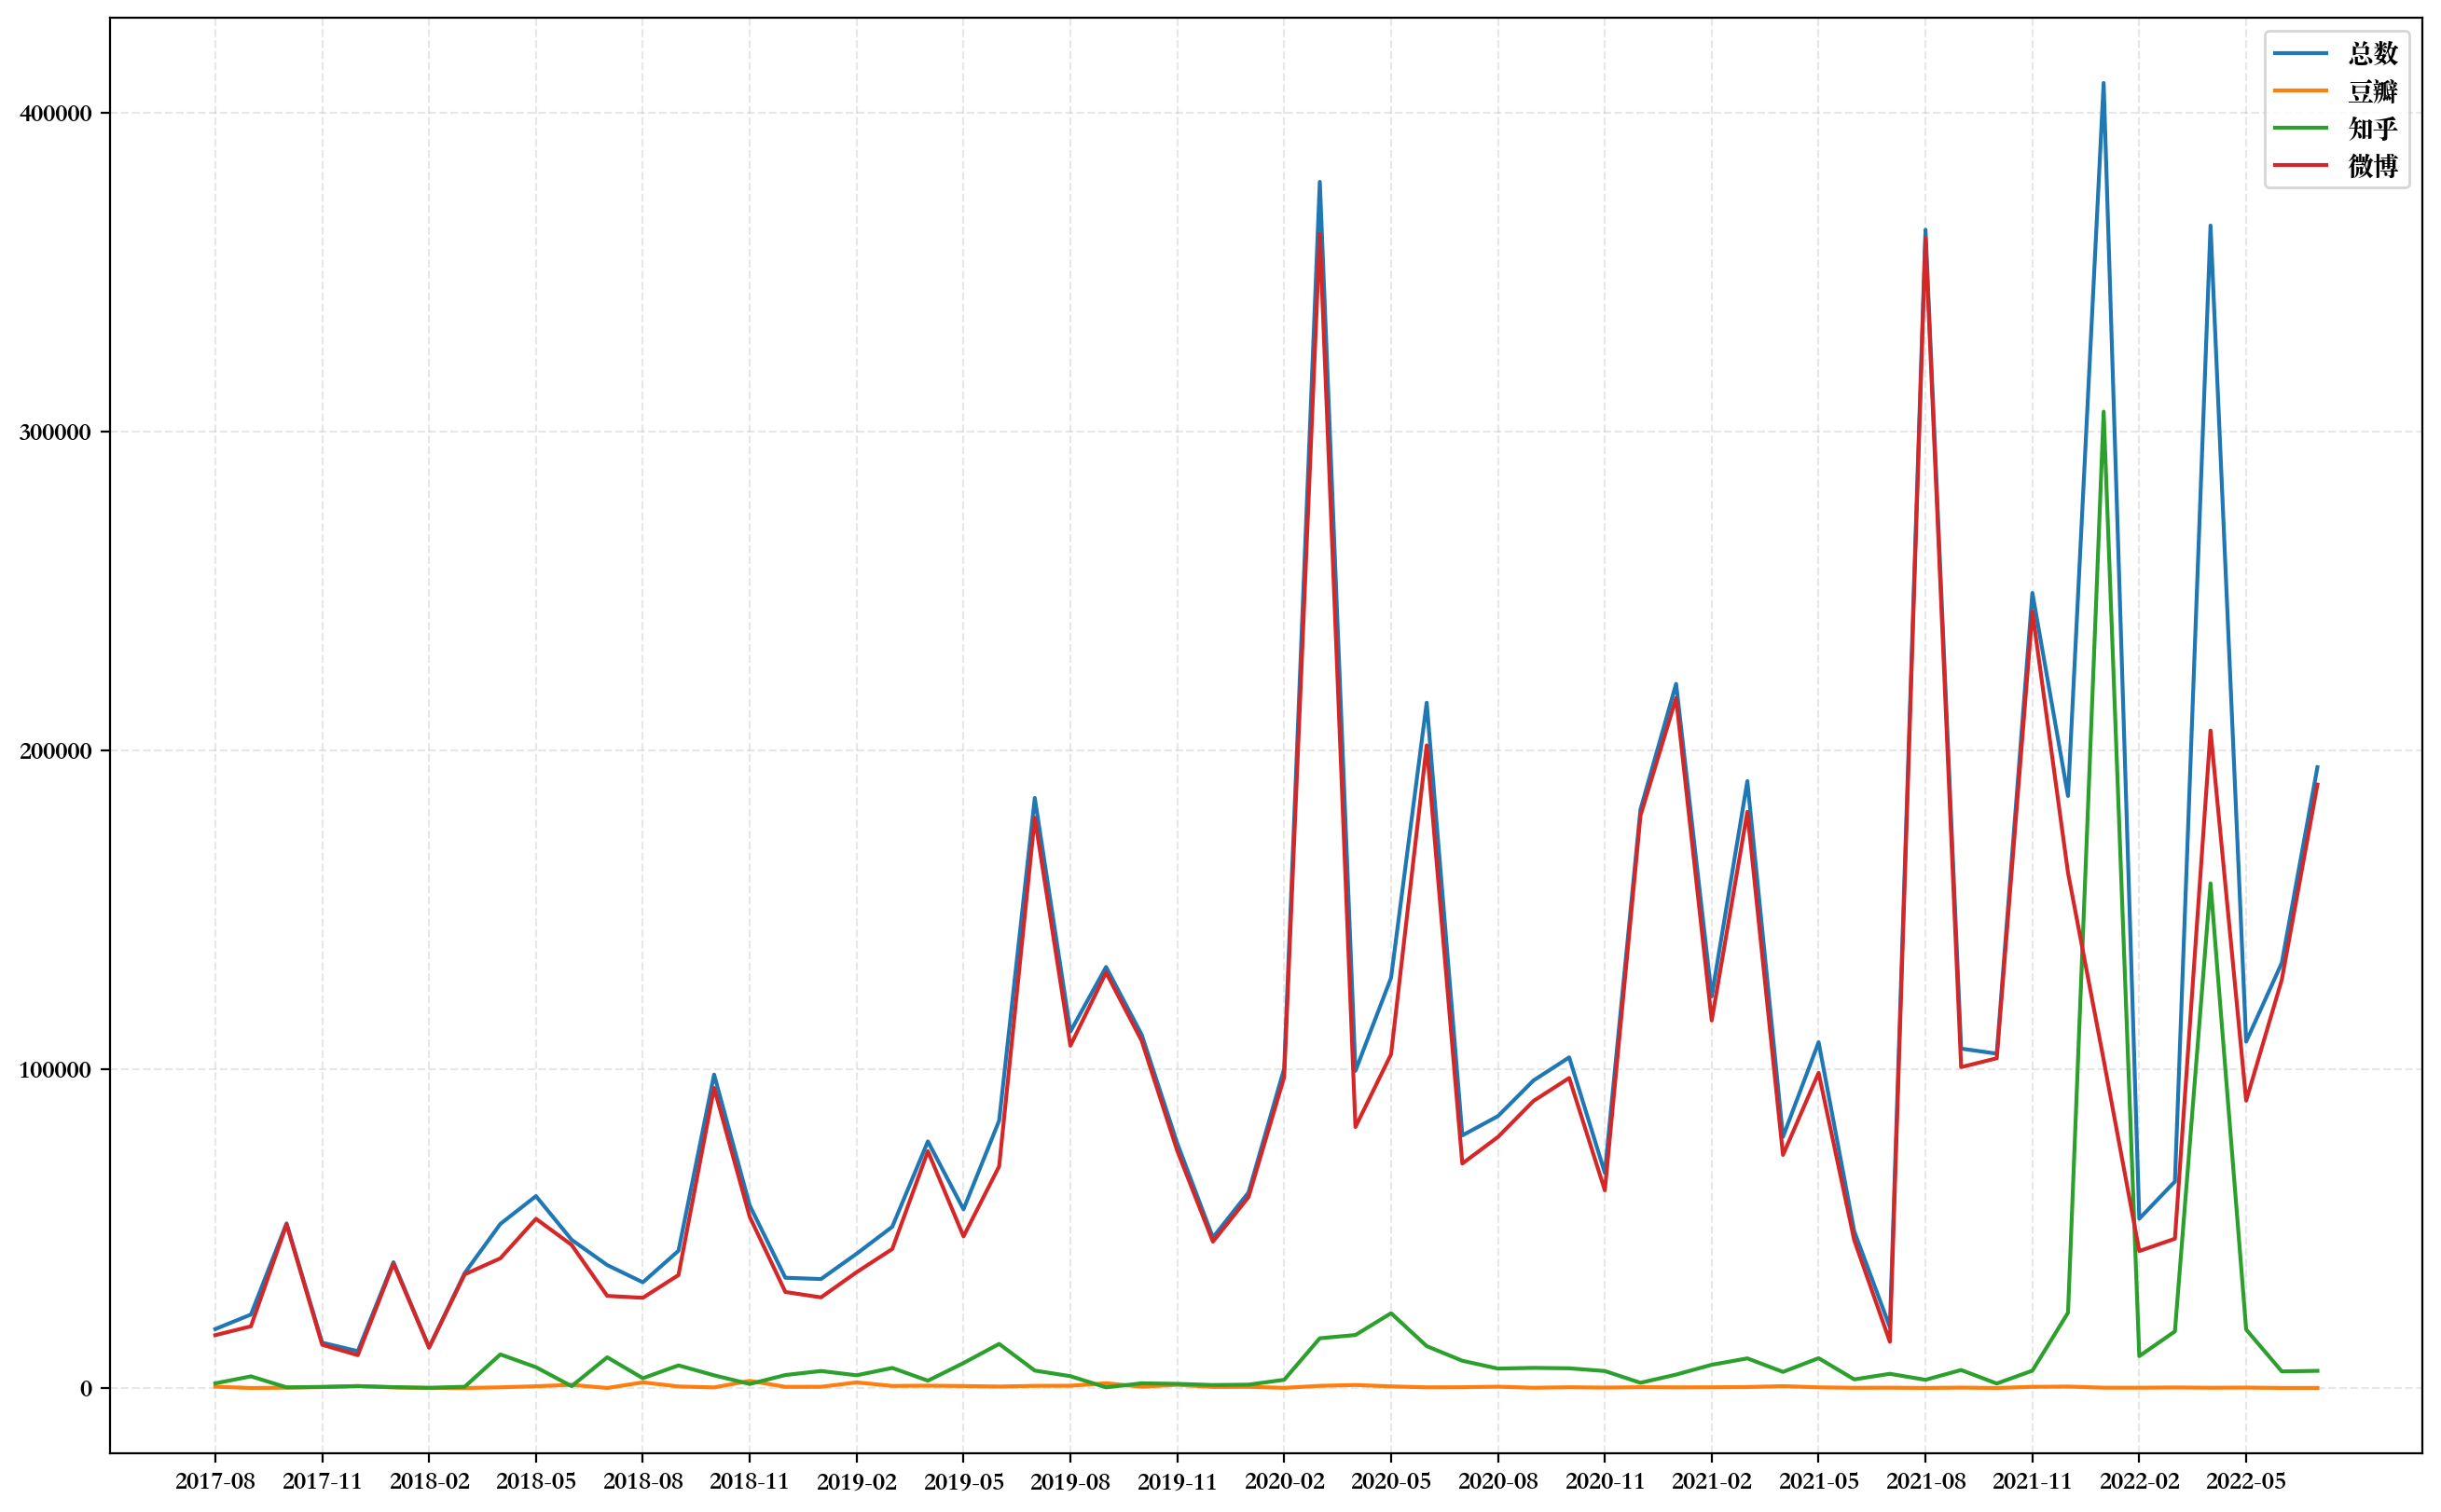

In [ ]:
ax = data_vote_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(0,60,3))
ax.set_xticklabels(data_vote_count.index[::3])
ax.set_xlabel("")
plt.show()

#### 不同平台点赞分布

In [ ]:
app_data = data[['点赞数', '平台']]
weibo = app_data[app_data['平台'] == '微博'].sample(1170)
zhihu = app_data[app_data['平台'] == '知乎'].sample(1170)
douban = app_data[app_data['平台'] == '豆瓣']
app_data = pd.concat([zhihu, weibo, douban])

In [ ]:
# 点赞数区间分割
bins=[0,2,5,10,20,30,40,50,60,70,80,90,100,120,150,200,500,1000,5000,10000,100000]
segments=pd.cut(data['点赞数'],bins,right=False)
seg_weibo = pd.cut(weibo['点赞数'],bins,right=False)
seg_zhihu = pd.cut(zhihu['点赞数'],bins,right=False)
seg_douban = pd.cut(douban['点赞数'],bins,right=False)

In [ ]:
# 点赞统计
vote_counts=pd.value_counts(segments,sort=False)
vote_counts_weibo=pd.value_counts(seg_weibo,sort=False)
vote_counts_zhihu=pd.value_counts(seg_zhihu,sort=False)
vote_counts_douban=pd.value_counts(seg_douban,sort=False)

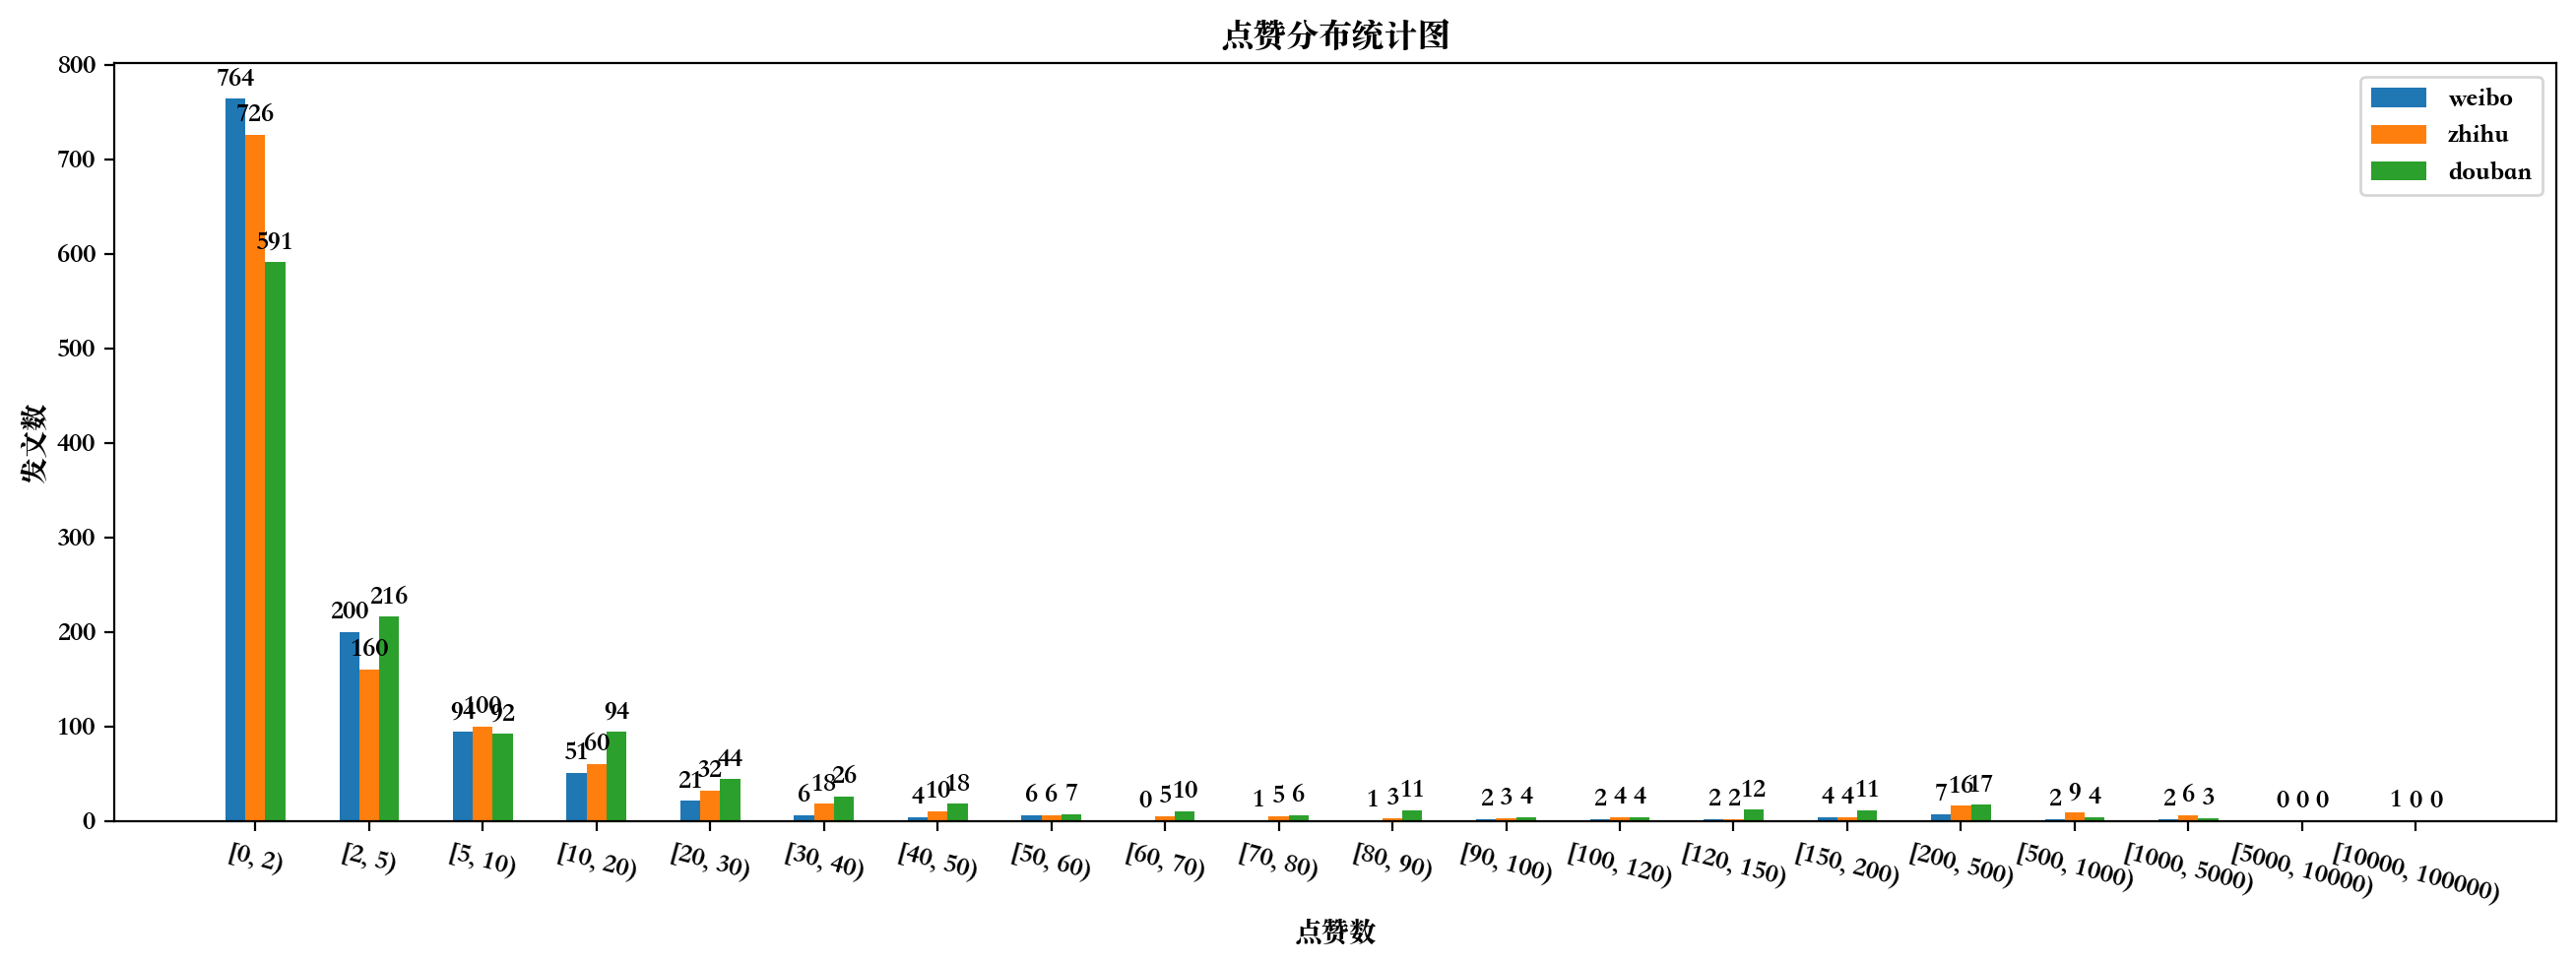

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
x = np.arange(len(vote_counts.index))
width = 0.35
weibo_bar = ax.bar(x - width/2, vote_counts_weibo, width/2, label='weibo')
zhihu_bar = ax.bar(x, vote_counts_zhihu, width/2, label='zhihu')
douban_bar = ax.bar(x + width/2, vote_counts_douban, width/2, label='douban')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(vote_counts.index.astype(str))
ax.set_xlabel('点赞数')
ax.set_ylabel('发文数')
ax.set_title('点赞分布统计图')
auto_label(douban_bar, ax)
auto_label(zhihu_bar, ax)
auto_label(weibo_bar, ax)
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

#### 特定时期 微博发布数

In [ ]:
data_weibo_during_the_covid_period = data[data['发布时间月份']=='2022-06'].copy()
data_weibo_during_the_covid_period['发布时间日期'] = data_weibo_during_the_covid_period['发布时间'].dt.strftime('%Y-%m-%d')
# 发布数统计（时间段）
data_date_count = pd.DataFrame()
data_date_count['总数'] = get_app_group_counts(data_weibo_during_the_covid_period, '发布时间日期')
for app_name in ['豆瓣','知乎','微博']:
    data_date_count[app_name] = get_app_group_counts(data_weibo_during_the_covid_period, '发布时间日期', app_name, is_fill_zero=True)
data_date_count = data_date_count.fillna(0)

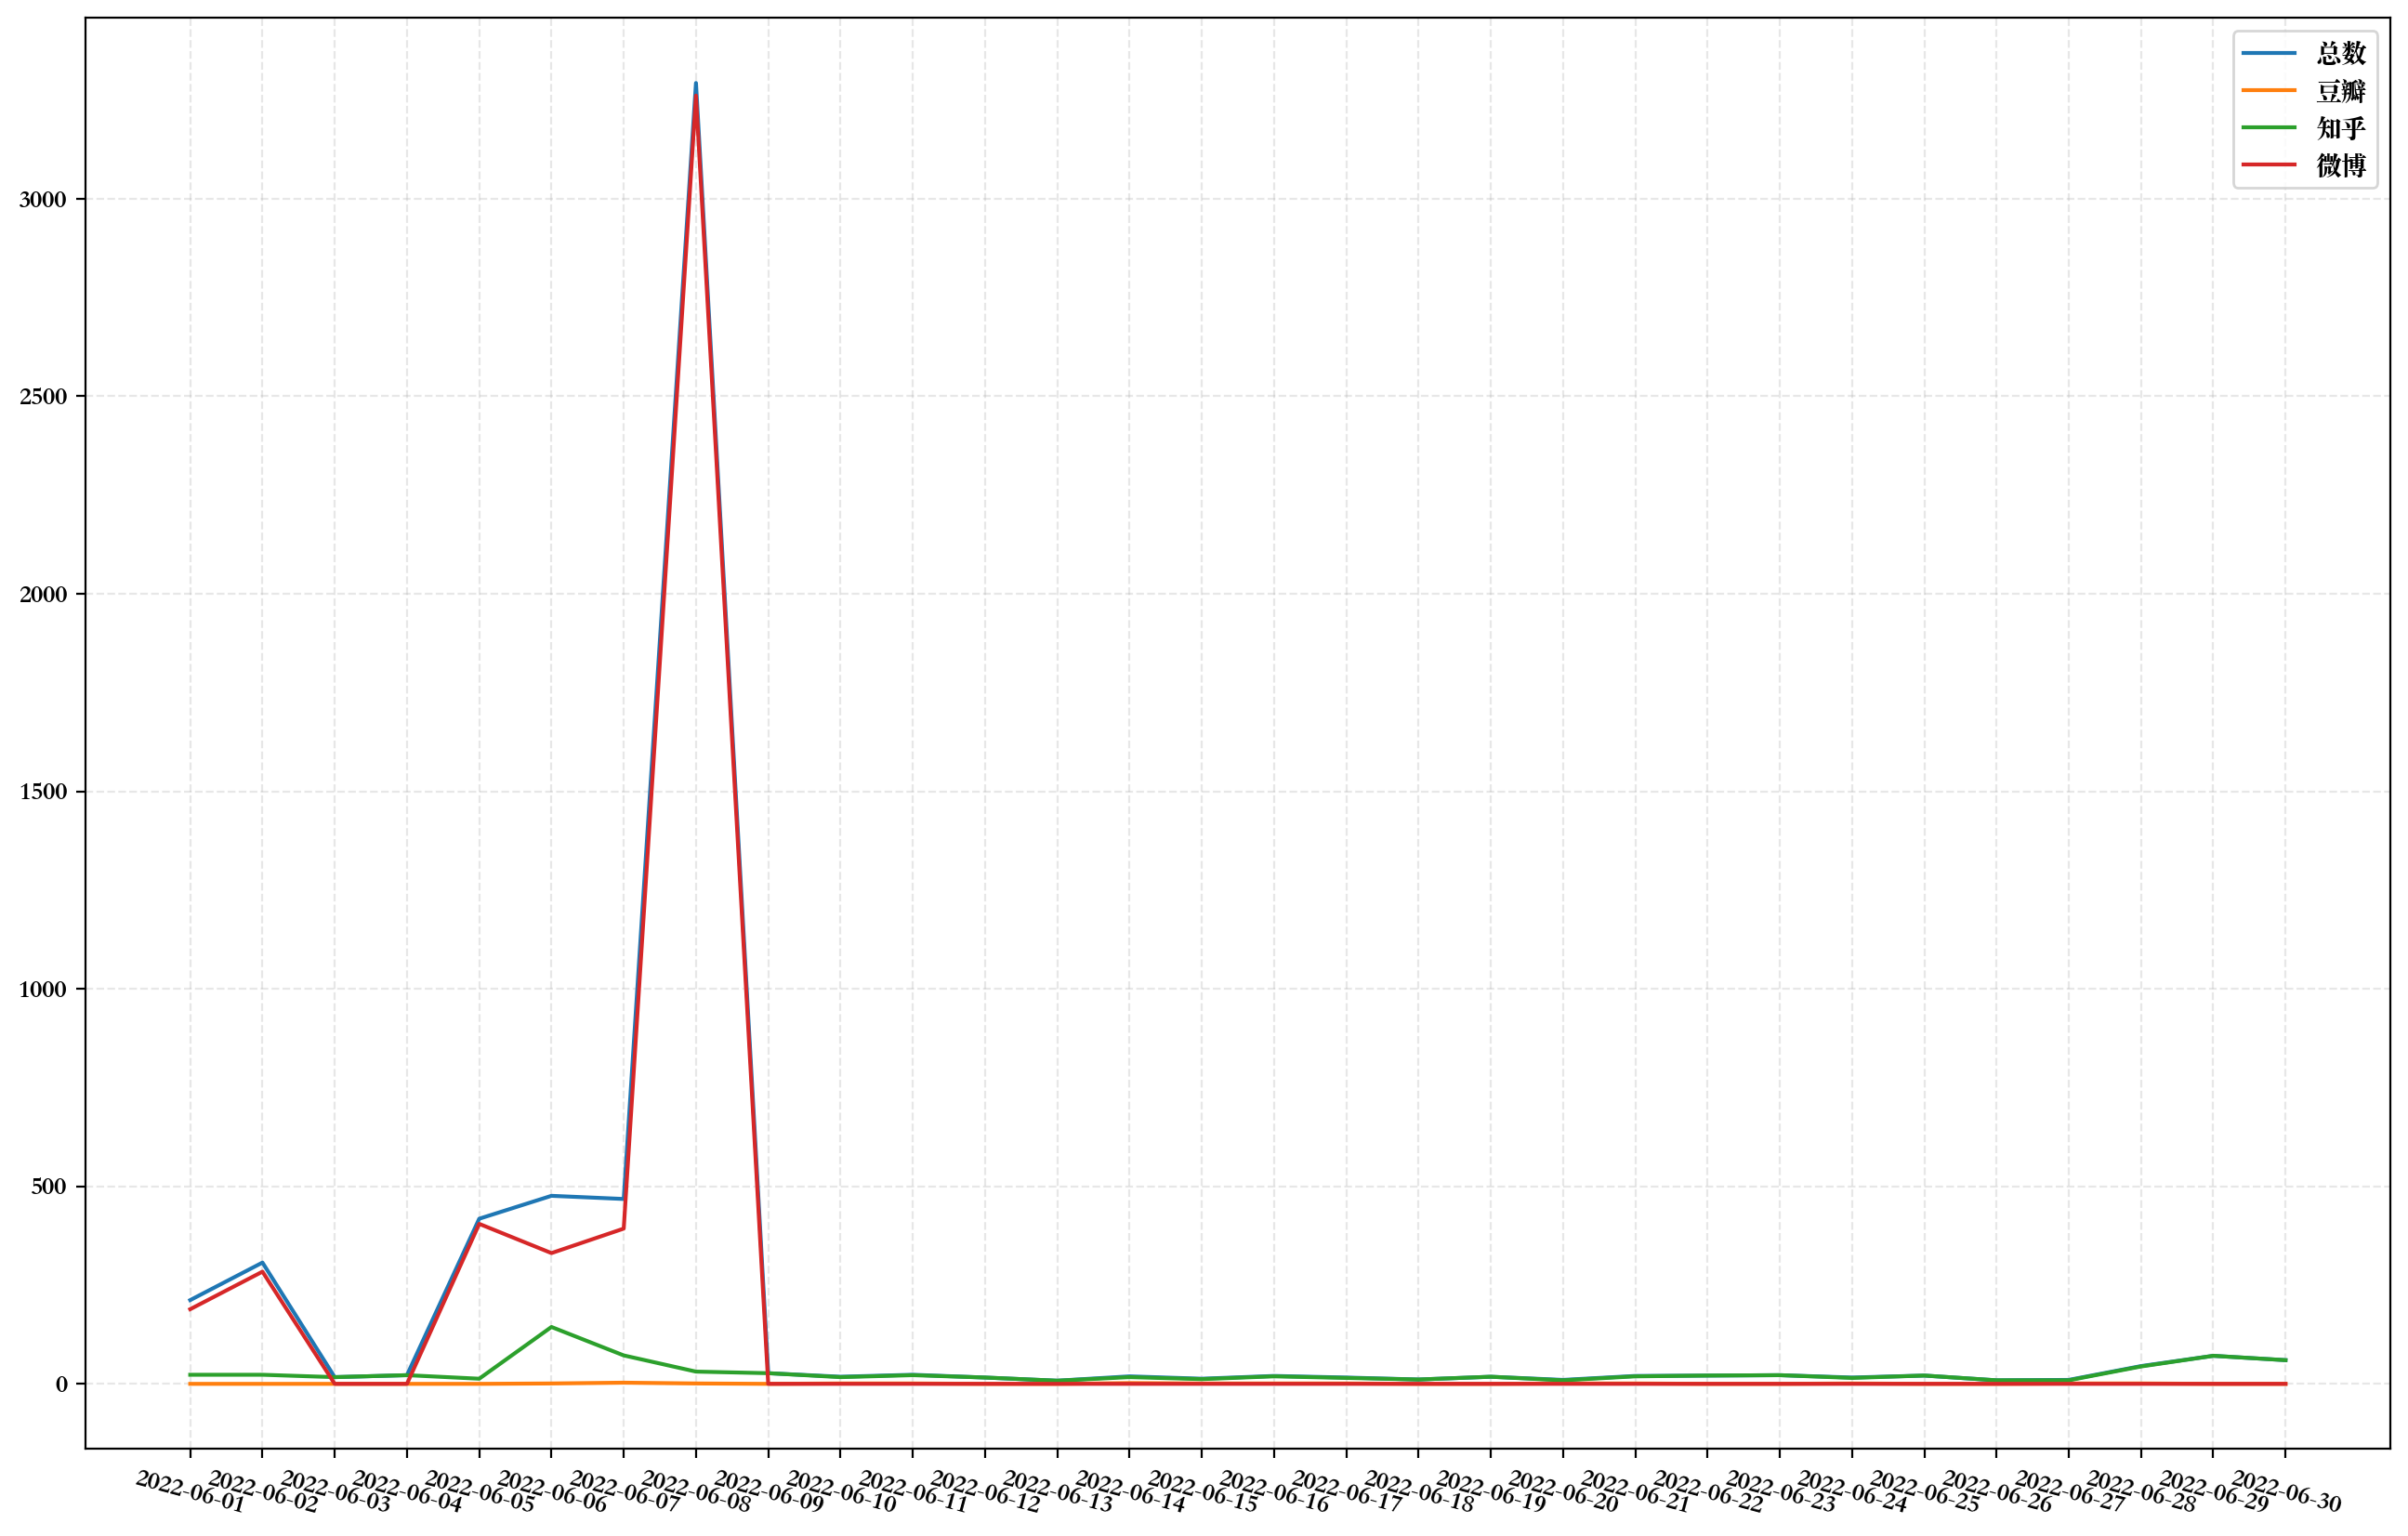

In [ ]:
ax = data_date_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
ax.set_xticks(range(len(data_date_count.index)))
ax.set_xticklabels(data_date_count.index)
ax.set_xlabel("")
plt.xticks(rotation=-15)
plt.show()

## 数据保存

In [ ]:
# data.to_pickle(get_new_path(DataFilePath,'时间分割'))